In [1]:
import importlib
import utils
importlib.reload(utils)
from sent_sampling.utils import extract_pool,model_grps_config
import utils.optim_utils
importlib.reload(utils.optim_utils)
from sent_sampling.utils.optim_utils import optim, optim_pool, pt_create_corr_rdm_short, optim_group
from sent_sampling.utils.data_utils import load_obj, SAVE_DIR, RESULTS_DIR, save_obj, ANALYZE_DIR
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from tqdm import tqdm
import os 
# import tqdm.notebook as tq
# from tqdm import tqdm_notebook
# import fnmatch 
# import copy
import pandas as pd 
import torch 

/usr/local/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /usr/local/lib/python3.7/site-packages/brainio_collection/lookup.csv


/usr/local/lib/python3.7/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [2]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
D_precompute=load_obj(os.path.join(SAVE_DIR, f"gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False_XY_corr_list.pkl"))

loading /om/user/ehoseini/MyData/sent_sampling/gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False_XY_corr_list.pkl


In [4]:
optim_ids=['coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=250-n_init=1-run_gpu=True']
results_files=['results_gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=250-n_init=1-run_gpu=True_low_dim_gpu.pkl',]

In [5]:
optim_files=[]
optim_results=[]
for result in results_files:
        optim_file=os.path.join(RESULTS_DIR,result)
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /om/user/ehoseini/MyData/sent_sampling/results/results_gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=250-n_init=1-run_gpu=True_low_dim_gpu.pkl


In [6]:
res=optim_results[0]
extract_grp=res['extractor_grp_name']
extract_name='gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers'
optimizer_obj = optim_pool[res['optimizatin_name']]()    
optim_group_obj = optim_group(n_init=optimizer_obj.n_init,extract_group_name=extract_name,
                                  ext_group_ids=extract_grp,
                                  n_iter=optimizer_obj.n_iter,
                                  N_s=optimizer_obj.N_s,
                                  objective_function=optimizer_obj.objective_function,
                                  optim_algorithm=optimizer_obj.optim_algorithm,
                                  run_gpu=optimizer_obj.run_gpu)



In [7]:
optim_group_obj.grp_XY_corr_list=D_precompute['grp_XY_corr_list']

In [65]:
import re 


In [72]:
extract_grp

['group=gpt2-xl_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
 'group=ctrl_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
 'group=bert-large-uncased-whole-word-masking_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
 'group=gpt2_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
 'group=openaigpt_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
 'group=lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False']

In [8]:
optim_group_obj.N_S=D_precompute['N_S']

In [ ]:
id_=0
ext_id= optim_group_obj.ext_group_ids[id_]
ext_obj=extract_pool[ext_id]()
ext_obj.load_dataset()
ext_obj()
optim_group_obj.optim_obj = optim(optim_algorithm=optim_group_obj.optim_algorithm, objective_function=optim_group_obj.objective_function,
                                   n_init=optim_group_obj.n_init, n_iter=optim_group_obj.n_iter, run_gpu=optim_group_obj.run_gpu, N_s=optim_group_obj.N_s)
optim_group_obj.optim_obj.load_extractor(ext_obj)

In [10]:
sentences=[x['text'] for x in optim_group_obj.optim_obj.extractor_obj.data_]

In [11]:
set_1_sents=[ sentences[x] for x in res['optimized_S']]

In [12]:
file_name='sentence_group=gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_ev.csv'
df_ev_selected=pd.read_csv(os.path.join(RESULTS_DIR,f"{file_name}"))

In [ ]:
#df_ev_selected[df_ev_selected['use?']=='1']

In [14]:
set_1_from_csv=list(df_ev_selected[df_ev_selected['set_num']==1]['sentence'])

In [15]:
corres=[]
for x in set_1_from_csv:
    corres.append(sentences.index(x))

In [19]:
set_1_from_ev=list(df_ev_selected[df_ev_selected['use?']=='1']['sentence'])
corres_ev=[]
for x in set_1_from_ev:
    corres_ev.append(sentences.index(x))

In [38]:
ds_ev=optim_group_obj.gpu_obj_function(corres_ev)

In [34]:
sent_random=list(np.random.choice(optim_group_obj.N_S,optim_group_obj.N_s))
optim_group_obj.gpu_obj_function(sent_random)

0.49154678

In [52]:
# get the random set 
ds_rand=[]
ds_rand_ev=[]
for k in tqdm(enumerate(range(250))):
    sent_random=list(np.random.choice(optim_group_obj.N_S,optim_group_obj.N_s))
    sent_random_ev=list(np.random.choice(optim_group_obj.N_S,len(corres_ev)))
    ds_rand.append(optim_group_obj.gpu_obj_function(sent_random))
    ds_rand_ev.append(optim_group_obj.gpu_obj_function(sent_random_ev))




250it [01:50,  2.26it/s]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


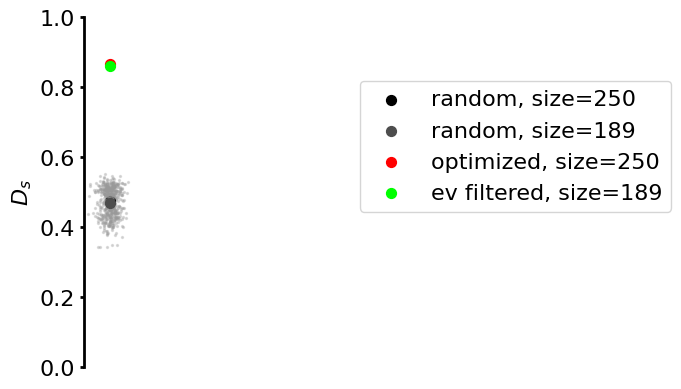

In [53]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig=plt.figure(figsize=(26,14),dpi=100,frameon=False)
ax=plt.axes((.1,.5,.02,.25))

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
idx=0
D_s_rand=ds_rand
ax.scatter(.2*np.random.normal(size=(np.asarray(D_s_rand).shape))+idx,np.asarray(D_s_rand),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(idx,np.asarray(D_s_rand).mean(),color=(0,0,0),s=50,label=f'random, size={optim_group_obj.N_s}')

ax.scatter(.2*np.random.normal(size=(np.asarray(ds_rand_ev).shape))+idx,np.asarray(ds_rand_ev),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(idx,np.asarray(ds_rand_ev).mean(),color=(.3,.3,.3),s=50,label=f'random, size={len(corres_ev)}')


ax.scatter(idx,res['optimized_d'],color=(1,0,0),s=50,label=f'optimized, size={optim_group_obj.N_s}')
ax.scatter(idx,ds_ev,color=(0,1,0),s=50,label=f'ev filtered, size={len(corres_ev)}')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.set_xlim((-.8,.8))
ax.set_ylim((0,1))
ax.set_xticks([])
ax.tick_params(direction='out', length=3, width=2, colors='k',
               grid_color='k', grid_alpha=0.5)


ax.legend(bbox_to_anchor=(5.1, .85), frameon=True)
ax.set_ylabel(r'$D_s$')

plt.savefig(os.path.join(ANALYZE_DIR,results_files[0].replace('.pkl','.pdf')), dpi=None, facecolor='w', edgecolor='w',
         orientation='landscape',
         transparent=True, bbox_inches=None, pad_inches=0.1,
         frameon=False)

In [50]:
results_files[0].replace('.pkl','.pdf')

'results_gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=250-n_init=1-run_gpu=True_low_dim_gpu.pdf'

In [60]:
# full set 
d_optim_list=[]
S=res['optimized_S']
for XY_corr_list in optim_group_obj.grp_XY_corr_list:
    d_optim_list.append(optim_group_obj.XY_corr_obj_func(S,XY_corr_list=XY_corr_list))

# ev selected     
d_optim_ev_list=[]
S=corres_ev
for XY_corr_list in optim_group_obj.grp_XY_corr_list:
    d_optim_ev_list.append(optim_group_obj.XY_corr_obj_func(S,XY_corr_list=XY_corr_list))



In [144]:

ds_rand_list=[]
for k in tqdm(enumerate(range(250))):
    ds_rand_=[]
    S=list(np.random.choice(optim_group_obj.N_S,optim_group_obj.N_s))
    for XY_corr_list in optim_group_obj.grp_XY_corr_list:
        ds_rand_.append(optim_group_obj.XY_corr_obj_func(S,XY_corr_list=XY_corr_list))
    ds_rand_list.append(ds_rand_)


250it [01:08,  3.64it/s]


In [120]:
model_names=[re.findall('.+_layers',x)[0][0:-7] for x in extract_grp]
model_names

['group=gpt2-xl',
 'group=ctrl',
 'group=bert-large-uncased-whole-word-masking',
 'group=gpt2',
 'group=openaigpt',
 'group=lm_1b']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


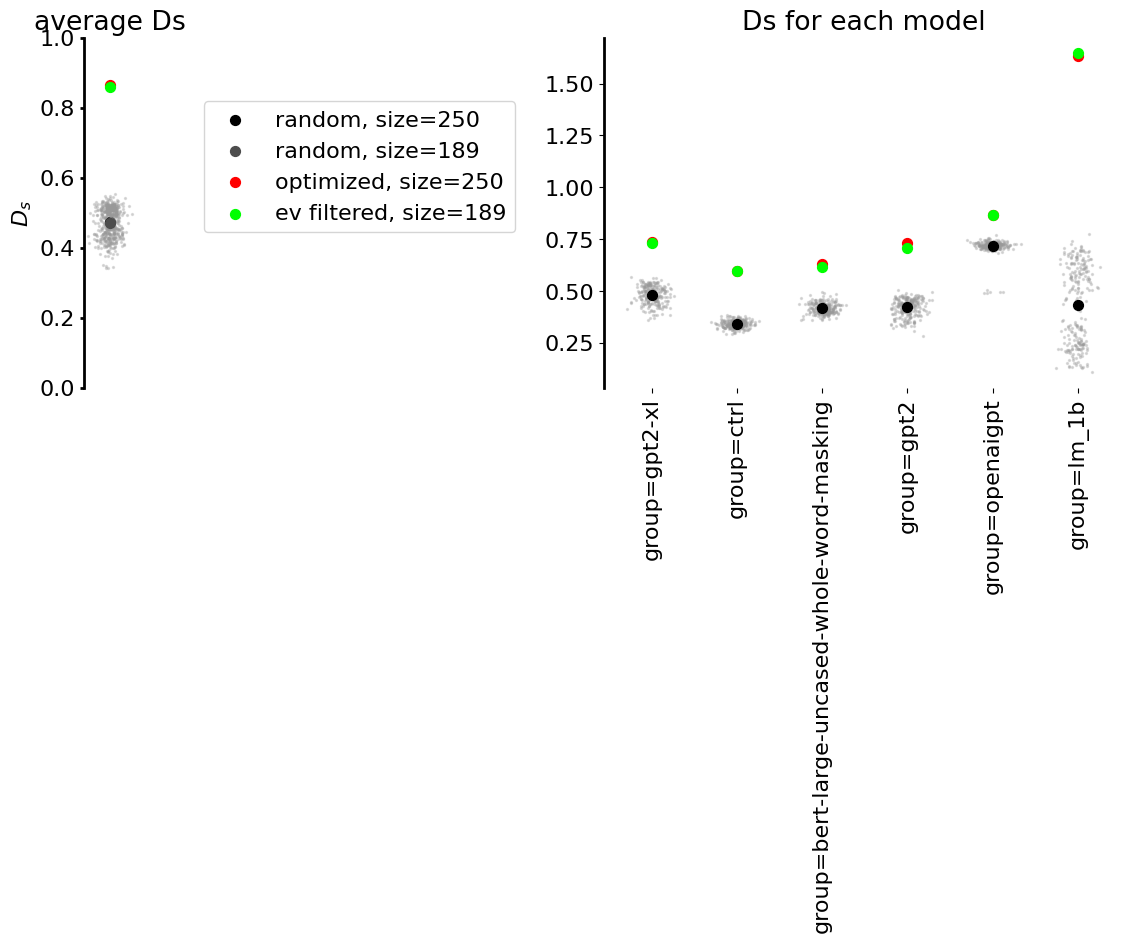

In [145]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig=plt.figure(figsize=(26,14),dpi=100,frameon=False)

ax=plt.axes((.1,.5,.02,.25))

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
idx=0
D_s_rand=ds_rand
ax.scatter(.2*np.random.normal(size=(np.asarray(D_s_rand).shape))+idx,np.asarray(D_s_rand),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(idx,np.asarray(D_s_rand).mean(),color=(0,0,0),s=50,label=f'random, size={optim_group_obj.N_s}')

ax.scatter(.2*np.random.normal(size=(np.asarray(ds_rand_ev).shape))+idx,np.asarray(ds_rand_ev),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(idx,np.asarray(ds_rand_ev).mean(),color=(.3,.3,.3),s=50,label=f'random, size={len(corres_ev)}')


ax.scatter(idx,res['optimized_d'],color=(1,0,0),s=50,label=f'optimized, size={optim_group_obj.N_s}')
ax.scatter(idx,ds_ev,color=(0,1,0),s=50,label=f'ev filtered, size={len(corres_ev)}')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.set_xlim((-.8,.8))
ax.set_ylim((0,1))
ax.set_xticks([])
ax.tick_params(direction='out', length=3, width=2, colors='k',
               grid_color='k', grid_alpha=0.5)


ax.legend(bbox_to_anchor=(2.1, .85), frameon=True)
ax.set_ylabel(r'$D_s$')

ax.set_title('average Ds')

ax=plt.axes((.3,.5,.2,.25))

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
idx=0
for idx,_ in enumerate(d_optim_ev_list):
    Ds_rand=np.asarray(ds_rand_list)[:,idx]
    ax.scatter(.1*np.random.normal(size=(np.asarray(Ds_rand).shape))+idx,np.asarray(Ds_rand),color=(.6,.6,.6),s=2,alpha=.3)
    ax.scatter(idx,np.asarray(Ds_rand).mean(),color=(0,0,0),s=50)

    

    ax.scatter(idx,d_optim_list[idx],color=(1,0,0),s=50,label=f'optimized')
    ax.scatter(idx,d_optim_ev_list[idx],color=(0,1,0),s=50,label=f'ev filtered')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines['left'].set_linewidth(2)
#ax.set_xlim((0,6))
# ax.set_ylim((0,1))
ax.set_xticks(list(range(len(d_optim_ev_list))))
ax.set_xticklabels(model_names,rotation = 90)
# ax.tick_params(direction='out', length=3, width=2, colors='k',
#                grid_color='k', grid_alpha=0.5)

ax.set_title('Ds for each model')

# ax.legend(bbox_to_anchor=(5.1, .85), frameon=True)
# ax.set_ylabel(r'$D_s$')

plt.savefig(os.path.join(ANALYZE_DIR,results_files[0].replace('.pkl','.pdf')), dpi=None, facecolor='w', edgecolor='w',
        orientation='landscape',
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=False)

In [125]:
ax.get_xticklabels()

[Text(0.0, 0, 'group=gpt2-xl'),
 Text(1.0, 0, 'group=ctrl'),
 Text(2.0, 0, 'group=bert-large-uncased-whole-word-masking'),
 Text(3.0, 0, 'group=gpt2'),
 Text(4.0, 0, 'group=openaigpt'),
 Text(5.0, 0, 'group=lm_1b'),
 Text(6.0, 0, ''),
 Text(7.0, 0, '')]

In [27]:
results_o

[0.86519027, 0.8602492, 0.860658, 0.8630843, 0.86337405]

In [ ]:
res=optim_results[1]
extract_grp=res['extractor_grp_name']
    
    
    
optimizer_obj = optim_pool[res['optimizatin_name']]()
    
optim_group_obj = optim_group(n_init=optimizer_obj.n_init,
                                  extract_group_name=extract_name,
                                  ext_group_ids=extract_grp,
                                  n_iter=optimizer_obj.n_iter,
                                  N_s=optimizer_obj.N_s,
                                  objective_function=optimizer_obj.objective_function,
                                  optim_algorithm=optimizer_obj.optim_algorithm,
                                  run_gpu=optimizer_obj.run_gpu)
        



optim_group_obj.load_extr_grp_and_corr_rdm_in_low_dim()

In [ ]:

ext_obj=extract_pool[optim_group_obj.ext_group_ids[1]]()
ext_obj.load_dataset()
ext_obj()
            # load optim
optim_obj = optim(optim_algorithm=optim_group_obj.optim_algorithm, objective_function=optim_group_obj.objective_function,
                          n_init=optim_group_obj.n_init, n_iter=optim_group_obj.n_iter, run_gpu=optim_group_obj.run_gpu, N_s=optim_group_obj.N_s)
optim_group_obj.optim_obj.load_extractor(ext_obj)#
del ext_obj
optim_group_obj.N_S=optim_group_obj.optim_obj.N_S
#optim_group_obj.optim_obj.precompute_corr_rdm_on_gpu(low_dim=200,low_resolution=True,cpu_dump=True)

In [ ]:
act_dict=optim_group_obj.optim_obj.activations[1]
act_=[x[0] for x in act_dict['activations']]
act = torch.tensor(act_, dtype=float, device=device,requires_grad=False)
act

In [ ]:
act_=[x[0] if isinstance(act_dict['activations'][0], list) else x for x in act_dict['activations']]
act = torch.tensor(act_, dtype=float, device=device,requires_grad=False)
act.shape

In [ ]:
optim_group_obj
if os.path.exists(os.path.join(SAVE_DIR,f"{optim_group_obj.extract_group_name}_XY_corr_list.pkl")):
        D_precompute=load_obj(os.path.join(SAVE_DIR, f"{optim_group_obj.extract_group_name}_XY_corr_list.pkl"))
        optim_group_obj.grp_XY_corr_list=D_precompute['grp_XY_corr_list']
        optim_group_obj.N_S=D_precompute['N_S']

In [ ]:

#sort_idx=np.asarray([x+optim_ids[idx] for idx,x in enumerate(group_ids)]).argsort()
sort_idx=np.asarray([f"{x}_{optim_ids[idx]}" for idx,x in enumerate(group_ids)]).argsort()


In [ ]:
unique_groups=list(set(group_ids))

In [ ]:
fig = plt.figure(figsize=[15,15])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(unique_groups)),len(unique_groups)))
tick_l=[]
tick=[]
for idx,sort_idx in enumerate(sort_idx):
    res=results_o[sort_idx]
    
    ax.barh(idx,res,height=0.4,color=alph_col[[unique_groups.index(group_ids[sort_idx])],:],alpha=.9,edgecolor=(0,0,0),linewidth=2,label=optim_ids[sort_idx])
    
    str_val="{:.5f}".format(res)
    print(f"{str_val}")
    optim_type=re.search('obj=\w+-',optim_ids[sort_idx])[0][0:-1]
    num_s=re.search('n_samples=\d+-',optim_ids[sort_idx])[0][0:-1]
    group_type=re.search('group=.+-d',group_ids[sort_idx])[0][0:-2]
    dataset_type=re.search('dataset=\w+-',group_ids[sort_idx])[0][0:-1]
    tick_l.append(f" {group_type}, {optim_type}, s: {num_s} \n {dataset_type}  ,  value:{str_val}")
    tick.append(idx)

    D_s_rand=resutls_rnd[sort_idx]
    ax.barh(idx, np.mean(D_s_rand),height=0.4, align='center',color=(1,1,1),alpha=.7,edgecolor=(1,1,1),linewidth=2)
    ax.errorbar(np.mean(D_s_rand),idx,xerr=np.std(D_s_rand),color=(0,0,0),label='random set',linewidth=3)


#ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
#ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
ax.invert_yaxis()
ax.grid()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))
#plt.savefig(os.path.join(ANALYZE_DIR,f"U01_SET2_optimization_results.png"), dpi=None, facecolor='w', edgecolor='w',
#       orientation='portrait',transparent=True, bbox_inches=None, pad_inches=0.1,frameon=False)  


In [ ]:
unique_groups.index(group_ids[sort_idx])

In [ ]:
group_ids

In [ ]:
num_iter=50

for id_g, res in enumerate(group_ids):
    if id_g>-1:
        
        ext_obj=extract_pool[res]()
        mdl_name=np.unique(ext_obj.model_spec)[0]
        layers_to_optim=ext_obj.layer_spec
        group=f'{mdl_name}_layers'
        extractor_id=f'group={group}-dataset={ext_obj.dataset}-{ext_obj.extract_type}-bench=None-ave={ext_obj.average_sentence}'
        extractor_obj = extract_pool[extractor_id]()
        extractor_obj.load_dataset()
        model_layers = extractor_obj.layer_name
        extractor_obj()
        mdl_name=str(np.unique(extractor_obj.model_spec).squeeze())
        optim_obj=optim_pool[optim_ids[id_g]]()
        optim_obj.load_extractor(extractor_obj)
        layer_id_list=[x['layer'] for x in optim_obj.activations]
        del extractor_obj
        activation_list=[]
        var_explained=[]
        loadings=[]
        components=[]
        pca_type='fixed'
        for idx, act_dict in tqdm(enumerate(optim_obj.activations)):
            act=torch.tensor(act_dict['activations'], dtype=float, device=optim_obj.device, requires_grad=False)
    # act must be in m sample * n feature shape ,
            u,s,v=torch.pca_lowrank(act,q=200)
    # keep 85% variance explained ,
            idx_85=torch.cumsum(s**2,dim=0)/torch.sum(s**2)<.85
            cols=list(torch.where(idx_85)[0].cpu().numpy())
            if pca_type=='fixed':
                act_pca = torch.matmul(act, v[:, :100])
            elif pca_type=='equal_var':
                act_pca = torch.matmul(act, v[:, cols])
        
            activation_list.append(act_pca)
            var_explained.append(torch.cumsum(torch.cat((torch.tensor([0],device=optim_obj.device),s**2)),dim=0)/torch.sum(s**2))
    #var_explained.append(torch.cumsum(s**2,dim=0)/torch.sum(s**2))
        var_explained=torch.stack(var_explained).cpu()
  
        total_sent=activation_list[0].shape[0]
        num_samples=len(optim_set[id_g])
        act_list_norm=[(X-X.mean(axis=1,keepdim=True)) for X in activation_list]
        act_list_norm=[torch.nn.functional.normalize(X) for X in act_list_norm]
        layer_dist=[]
        for idx in tqdm_notebook(range(len(activation_list))):
            pair_dist=[]
            for idy in tqdm_notebook(range(len(activation_list)),position=1):
                sample_dist=[]
                pair_list_norm=[act_list_norm[idx],act_list_norm[idy]]
                XY_corr_list = [torch.tensor(1, device=X.device, dtype=float) - torch.mm(X, torch.transpose(X, 1, 0)) for X in
                            pair_list_norm]
                for sample_iter in range(num_iter):
                    samples=torch.tensor(np.random.choice(total_sent,num_samples,replace=False), dtype = torch.long, device = act_list_norm[0].device)
                    pairs = torch.combinations(samples, with_replacement=False)
                    XY_corr_sample = [XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
                    XY_corr_sample_tensor = torch.stack(XY_corr_sample)
                    XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
                    if XY_corr_sample_tensor.shape[1] < XY_corr_sample_tensor.shape[0]:
                        XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
                    assert (XY_corr_sample_tensor.shape[1] > XY_corr_sample_tensor.shape[0])
                    d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=samples.device)
                #n1 = d_mat.shape[1],
                #correction = n1 * n1 / (n1 * (n1 - 1) / 2),
                #d_val = correction * d_mat.mean(dim=(0, 1)),
                    d_val = d_mat[0,1]
                    sample_dist.append(d_val)
                pair_dist.append(torch.stack(sample_dist))
            layer_dist.append(pair_dist)
            
        optim_act_list_norm=[x[optim_set[id_g],:] for x in act_list_norm]
        layer_similarity=[pt_create_corr_rdm_short(x) for x in optim_act_list_norm]
        optim_pairs = torch.combinations(torch.tensor(np.arange(len(optim_set[id_g]))), with_replacement=False)
        layer_optim_dist=[]
        for idx in tqdm_notebook(range(len(activation_list))):
            pair_optim_dist=[]
            for idy in tqdm_notebook(range(len(activation_list)),position=1):
                pair_similarity=[layer_similarity[idx],layer_similarity[idy]]
                XY_corr_sample = [XY_corr[optim_pairs[:, 0], optim_pairs[:, 1]] for XY_corr in pair_similarity]
                XY_corr_sample_tensor=torch.stack(XY_corr_sample)
                d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=XY_corr_sample_tensor.device)
                d_val =d_mat[0,1].cpu()
                pair_optim_dist.append([d_val])
            layer_optim_dist.append(pair_optim_dist)
        print("Done!")
        pereira_settings=extract_pool['group=best_performing_pereira_1-dataset=ud_sentences-activation-bench=None-ave=False']()
        scores = pd.read_csv(os.path.join(SAVE_DIR, 'scoresscoresscores', 'scores-Pereira2018-encoding-normalized.csv'))
        score_layer = list(scores['layer'][scores['model'] == mdl_name])
        score_benchmark = list(scores['benchmark'][scores['model'] == mdl_name])
        score_score = np.asarray(scores['score'][scores['model'] == mdl_name])
        score_error = np.asarray(scores['error'][scores['model'] == mdl_name])
        try :
            model_loc = pereira_settings.model_spec.index(mdl_name)
            pereira_layer_id=pereira_settings.layer_spec[model_loc]
        except ValueError as e:
            pereira_layer_id=np.argmax(score_score)
        
        
        Pereira_dist=torch.mean(torch.stack(layer_dist[pereira_layer_id]),dim=1)
        dist_val,dist_idx=torch.sort(Pereira_dist)
        assert(dist_idx[0]==pereira_layer_id)
        cuts=np.linspace(dist_val.cpu().numpy().min(),dist_val.cpu().numpy().max(),4,endpoint=False)
        Pereira_dist_optim=torch.tensor([torch.stack([x[0] for x in y]) for y in layer_optim_dist][pereira_layer_id])
        dist_val_optim,dist_idx_optim=torch.sort(Pereira_dist_optim)
        Pereira_ordered=Pereira_dist_optim[dist_idx]
        assert(dist_idx[0]==pereira_layer_id)
        high_val=float(torch.max(torch.stack([torch.stack([x[0] for x in y]) for y in layer_optim_dist]).cpu()))
        fig = plt.figure(figsize=(8,8*1.5))
        ax = fig.add_axes((.1,.4,.25*1.5,.25))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size=.05, pad=0.1)
        im = ax.imshow(torch.stack([torch.stack([x.mean() for x in y]) for y in layer_dist]).cpu(),vmin=0,vmax=high_val,aspect='auto',interpolation='none')
        ax.set_yticks(np.arange(var_explained.shape[0]))
        ax.set_xticks(np.arange(var_explained.shape[0]))
        ax.set_yticklabels([f" {model_layers[idx]}" for idx,x in enumerate(var_explained) ],fontsize=8)
        ax.set_xticklabels([f"{model_layers[idx]}" for idx,x in enumerate(var_explained) ],rotation=90,fontsize=8)

        cbar = fig.colorbar(im, cax=cax)


        ax = fig.add_axes((.55,.4,.25*1.5,.25))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size=.05, pad=0.1)
        im = ax.imshow(torch.stack([torch.stack([x[0] for x in y]) for y in layer_optim_dist]).cpu(),aspect='auto',vmin=0,vmax=high_val,interpolation='none')
        ax.set_yticks(np.arange(var_explained.shape[0]))
        ax.set_xticks(np.arange(var_explained.shape[0]))
        ax.set_yticklabels([ ])
        ax.set_xticklabels([ ],rotation=90)

        cbar = fig.colorbar(im, cax=cax)
        ax = fig.add_axes((.2,.1,.7,.12))
        ax.scatter(np.arange(dist_val.cpu().shape[0]),dist_val.cpu(),zorder=3)
        ax.scatter(np.arange(dist_val_optim.cpu().shape[0]),Pereira_ordered.cpu(),zorder=4)

        ax.set_xlim((-1,dist_val_optim.cpu().shape[0]+1))
        ax.set_ylim((0-.05,np.max(dist_val_optim.cpu().numpy())+.05))
        #[ax.plot(plt.xlim(),[x,x],'k--') for x in cuts],
        #closest_points=[np.argmin(np.abs(dist_val.cpu()-x)) for x in cuts],
        #optimized_dist=torch.tensor([dist_val_optim[dist_idx_optim==x] for x in extractor_obj.layer_spec]),
        #optimized_dist_loc=torch.tensor([torch.where(dist_idx_optim==x) for x in extractor_obj.layer_spec]),
        #ax.scatter(optimized_dist_loc.cpu(),optimized_dist.cpu(),50,color=(0,0,0)),
        closest_points=[int(np.where(dist_idx.cpu().numpy()==x)[0]) for x in layers_to_optim]
        [ax.scatter(x,dist_val[x].cpu().numpy(),50,color=(0,0,0),zorder=5) for x in closest_points]
        [ax.scatter(x,Pereira_ordered[x].cpu().numpy(),50,color=(1,0,0),zorder=5) for x in closest_points]

        ax.set_xticks(tuple(np.arange(dist_val.cpu().shape[0])))
        ax.set_xticklabels(dist_idx.cpu().numpy(),fontsize=8)
        ax.set_xticklabels([model_layers[int(x)] for x in dist_idx.cpu().numpy()],rotation=90,fontsize=8)
        [ax.plot([x,x],plt.ylim(),'k-',zorder=2) for x in closest_points]
        
        ax.set_title( f"{res} , \n {optim_ids[id_g]}",fontsize=10)
        
        #plt.savefig(os.path.join(ANALYZE_DIR,f"{res['extractor_name']}_{res['optimizatin_name']}_RDM.png"), dpi=None, facecolor='w', edgecolor='w',
       #orientation='landscape',transparent=True, bbox_inches=None, pad_inches=0.1,frameon=False)  

# example sentences 

In [ ]:
for idx, res in enumerate(optim_results):
    select_sent=[]
    values=[]
    for name in res['extractor_grp_name']:
        ext_obj=extract_pool[name]()
        ext_obj.load_dataset()
        [values.append([id, ext_obj.data_[id]['text']]) for id in np.sort(res['optimized_S'])]
        with open(os.path.join(RESULTS_DIR,f"sentences_{name}_{res['optimizatin_name']}.txt"), 'w') as f:
            for item in values:
                f.write("%d, %s\n" % (item[0],item[1]))

In [ ]:
len(optim_set)

# pca plots 

In [ ]:
for id_g, res in enumerate(group_ids):
    if id_g>-1:
        ext_obj=extract_pool[res]()
        mdl_name=np.unique(ext_obj.model_spec)[0]
        layers_to_optim=ext_obj.layer_spec
        group=f'{mdl_name}_layers'
        extractor_id=f'group={group}-dataset={ext_obj.dataset}-{ext_obj.extract_type}-bench=None-ave={ext_obj.average_sentence}'
        extractor_obj = extract_pool[extractor_id]()
        extractor_obj.load_dataset()
        model_layers = extractor_obj.layer_name
        extractor_obj()
        mdl_name=str(np.unique(extractor_obj.model_spec).squeeze())
        optim_obj=optim_pool[optim_ids[id_g]]()
        optim_obj.load_extractor(extractor_obj)
        layer_id_list=[x['layer'] for x in optim_obj.activations]
        del extractor_obj
        activation_list=[]
        var_explained=[]
        loadings=[]
        components=[]
        pca_type='fixed'
        for idx, act_dict in tqdm(enumerate(optim_obj.activations)):
            act=torch.tensor(act_dict['activations'], dtype=float, device=optim_obj.device, requires_grad=False)
    # act must be in m sample * n feature shape ,
            u,s,v=torch.pca_lowrank(act,q=200)
            loadings.append(torch.matmul(u,torch.diag(s)))
            components.append(v)
            # keep 85% variance explained ,
            idx_85=torch.cumsum(s**2,dim=0)/torch.sum(s**2)<.85
            cols=list(torch.where(idx_85)[0].cpu().numpy())
            if pca_type=='fixed':
                act_pca = torch.matmul(act, v[:, :100])
            elif pca_type=='equal_var':
                act_pca = torch.matmul(act, v[:, cols])
        
            activation_list.append(act_pca)
            var_explained.append(torch.cumsum(torch.cat((torch.tensor([0],device=optim_obj.device),s**2)),dim=0)/torch.sum(s**2))
    #var_explained.append(torch.cumsum(s**2,dim=0)/torch.sum(s**2))
        var_explained=torch.stack(var_explained).cpu()
        loadings_p12=[x[:,0:2].cpu() for x in loadings]
        loadings_p12_norm=[x/torch.norm(x,dim=1,keepdim=True) for x in loadings_p12]
        loadings_p12_len=[1e1*torch.norm(x,dim=1,keepdim=True) for x in loadings_p12]
        rot_list=[]
        all_angle_fixed=[]
        for idx, load_norm in enumerate(loadings_p12_norm):
            angle=np.arccos(load_norm[:,0].numpy())
            y_cos=load_norm[:,1].numpy()
            angle_fixed=[angle[idy] if y > 0 else np.pi*2-angle[idy] for idy,y in enumerate(y_cos)]
            mag_angle=loadings_p12_len[idx].squeeze()+1e3*torch.tensor(angle_fixed)
            all_angle_fixed.append(angle_fixed)
            rot=np.argsort(angle_fixed)
            #rot=np.argsort(mag_angle)
            rot_list.append(rot)
        pereira_settings=extract_pool['group=best_performing_pereira_1-dataset=ud_sentences-activation-bench=None-ave=False']()
        scores = pd.read_csv(os.path.join(SAVE_DIR, 'scoresscoresscores', 'scores-Pereira2018-encoding-normalized.csv'))
        score_layer = list(scores['layer'][scores['model'] == mdl_name])
        score_benchmark = list(scores['benchmark'][scores['model'] == mdl_name])
        score_score = np.asarray(scores['score'][scores['model'] == mdl_name])
        score_error = np.asarray(scores['error'][scores['model'] == mdl_name])
        try :
            model_loc = pereira_settings.model_spec.index(mdl_name)
            pereira_layer_id=pereira_settings.layer_spec[model_loc]
        except ValueError as e:
            pereira_layer_id=np.argmax(score_score)
        idx=pereira_layer_id
        fig=plt.figure(figsize=(20,20))
        num_colors=int(rot.shape[0])
        h0=sns.color_palette("hls", num_colors,as_cmap=True)
        line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
        #plt.suptitle(f"{group}\n{name}",fontsize=16)
        plot_ev_select=True
        ax=plt.subplot(1,1,1)
        l_v=loadings_p12[idx]
        onehot_target=torch.nn.functional.one_hot(torch.tensor(rot_list[idx]))
        val,indicies=torch.max(onehot_target.transpose(1,0),dim=1)
        col_order=line_cols[indicies,:]
        if plot_ev_select:
            scatter1=ax.scatter(l_v[optim_set[id_g],0],l_v[optim_set[id_g],1],s=25,c='none',edgecolors=(0,0,0),linewidth=1.5,alpha=1,zorder=4)
        scatter_pca=ax.scatter(l_v[:,0],l_v[:,1],s=20,c=col_order,edgecolors=(1,1,1),alpha=.5,linewidth=.5,zorder=3)
        right_side = ax.spines["right"]
        right_side. set_visible(False)
        right_side = ax.spines["top"]
        right_side. set_visible(False)
        right_side = ax.spines["left"]
        right_side. set_visible(False)
        right_side = ax.spines["bottom"]
        right_side. set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_xlim(ax_lims[:,0])
        #ax.set_ylim(ax_lims[:,1])
        ax.plot(ax.get_xlim(),[0,0],'-',zorder=0,linewidth=1,color=(.5,.5,.5))
        ax.plot([0,0],ax.get_ylim(),'-',zorder=0,linewidth=1,color=(.5,.5,.5))
#        ax.set_title(f"{optimizer_obj.activations[idx]['model_name']}, Layer {optimizer_obj.activations[idx]['layer']}",fontsize=20)
        ax.set_title( f"{res} , \n {optim_ids[id_g]}",fontsize=10)
        ax.spines['left'].set_position(('axes', 0.00))
        ax.spines['left'].set_smart_bounds(True)
            #ax.yaxis.set_ticks_position('left')   
        ax.spines['left'].set_position(('axes', 0.00))
            # ax.spines['left'].set_smart_bounds(True)
        ax.yaxis.set_ticks_position('left')

        ax.spines['bottom'].set_position(('axes', 0.00))



# PLOT RDMS 

In [ ]:
num_iter=100
num_samples=50

for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    mdl_name=np.unique(ext_obj.model_spec)[0]
    group=f'{mdl_name}_layers'
    extractor_id=f'group={group}-dataset={ext_obj.dataset}-{ext_obj.extract_type}-bench=None-ave={ext_obj.average_sentence}'
    extractor_obj = extract_pool[extractor_id]()
    extractor_obj.load_dataset()
    model_layers = extractor_obj.layer_name
    extractor_obj()
    mdl_name=str(np.unique(extractor_obj.model_spec).squeeze())
    optim_obj=optim_pool[res['optimizatin_name']]()
    optim_obj.load_extractor(extractor_obj)
    layer_id_list=[x['layer'] for x in optim_obj.activations]
    del extractor_obj
    activation_list=[]
    var_explained=[]
    loadings=[]
    components=[]
    pca_type='fixed'
    for idx, act_dict in tqdm(enumerate(optim_obj.activations)):
        act=torch.tensor(act_dict['activations'], dtype=float, device=optim_obj.device, requires_grad=False)
# act must be in m sample * n feature shape ,
        u,s,v=torch.pca_lowrank(act,q=200)
# keep 85% variance explained ,
        idx_85=torch.cumsum(s**2,dim=0)/torch.sum(s**2)<.85
        cols=list(torch.where(idx_85)[0].cpu().numpy())
        if pca_type=='fixed':
            act_pca = torch.matmul(act, v[:, :100])
        elif pca_type=='equal_var':
            act_pca = torch.matmul(act, v[:, cols])

        activation_list.append(act_pca)
        var_explained.append(torch.cumsum(torch.cat((torch.tensor([0],device=optim_obj.device),s**2)),dim=0)/torch.sum(s**2))
# #var_explained.append(torch.cumsum(s**2,dim=0)/torch.sum(s**2))
#     var_explained=torch.stack(var_explained).cpu()

    total_sent=activation_list[0].shape[0]
    act_list_norm=[(X-X.mean(axis=1,keepdim=True)) for X in activation_list]
    act_list_norm=[torch.nn.functional.normalize(X) for X in act_list_norm]
    optm_activation=[act_list_norm[x] for x in res['layer_spec']]
    layer_rand_dist=[]
    layer_optim_dist=[]
    for idx in tqdm(range(len(optm_activation))):
        pair_list_norm=[optm_activation[idx]]
        XY_corr_list = [torch.tensor(1, device=X.device, dtype=float) - torch.mm(X, torch.transpose(X, 1, 0)) for X in                         
        pair_list_norm]
        corr_samples=[]
        for sample_iter in range(num_iter):
            samples=torch.tensor(np.random.choice(total_sent,num_samples,replace=False), dtype = torch.long, device = act_list_norm[0].device)
            XY_corr_sample=[XY_corr[samples, :] for XY_corr in XY_corr_list]
            XY_corr_sample = [XY_corr[:, samples] for XY_corr in XY_corr_sample]
            corr_samples.append(XY_corr_sample[0])
        layer_rand_dist.append(corr_samples)
        
        
        XY_corr_optim=[XY_corr[res['optimized_S'], :] for XY_corr in XY_corr_list]
        XY_corr_optim = [XY_corr[:, res['optimized_S']] for XY_corr in XY_corr_optim]
        layer_optim_dist.append(XY_corr_optim)

    min_val=0
    max_val=torch.stack([x[0] for x in layer_optim_dist]).max()
    rand_dist_mean=[torch.stack(rand_dist).mean(axis=0) for rand_dist in layer_rand_dist]
    max_val_1=torch.stack(rand_dist_mean).max()
    max_val=np.max([max_val,max_val_1])
    fig,ax = plt.subplots(2,len(layer_optim_dist),figsize=(8*len(layer_optim_dist)/2,8) )
    for idx,_ in enumerate(layer_rand_dist):
        rand_dist=layer_rand_dist[idx]
        #ax[0,idx].imshow(torch.stack(rand_dist).mean(axis=0).cpu(),vmin=0,vmax=max_val)
        ax[0,idx].imshow(rand_dist[0].cpu(),vmin=0,vmax=max_val)
        ax[0,idx].set_title(model_layers[res['layer_spec'][idx]])
    ax[0,0].set_ylabel('random',fontsize=16)
    ax[0,0].set_xlabel('sentence')
    for idx,_ in enumerate(layer_optim_dist):
        optim_dist=layer_optim_dist[idx]
        ax[1,idx].imshow(optim_dist[0].cpu(),vmin=0,vmax=max_val)

    ax[1,0].set_ylabel('optimized',fontsize=16)
    plt.suptitle(f"{res['extractor_name']} , \n {res['optimizatin_name']} \n",fontsize=16)

#     optim_act_list_norm=[x[res['optimized_S'],:] for x in act_list_norm]
#     layer_similarity=[pt_create_corr_rdm_short(x) for x in optim_act_list_norm]
#     optim_pairs = torch.combinations(torch.tensor(np.arange(len(res['optimized_S']))), with_replacement=False)
#     layer_optim_dist=[]
#     for idx in tqdm_notebook(range(len(activation_list))):
#         pair_optim_dist=[]
#         for idy in tqdm_notebook(range(len(activation_list)),position=1):
#             pair_similarity=[layer_similarity[idx],layer_similarity[idy]]
#             XY_corr_sample = [XY_corr[optim_pairs[:, 0], optim_pairs[:, 1]] for XY_corr in pair_similarity]
#             XY_corr_sample_tensor=torch.stack(XY_corr_sample)
#             d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=XY_corr_sample_tensor.device)
#             d_val =d_mat[0,1].cpu()
#             pair_optim_dist.append([d_val])
#         layer_optim_dist.append(pair_optim_dist)
#     print("Done!")

In [ ]:
len(optm_activation)

In [ ]:
len(layer_rand_dist)

In [ ]:
X

In [ ]:
optim_ids=['coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=200-n_init=1-run_gpu=True']
extract_id = ['group=gpt2_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=openaigpt_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False']

In [ ]:


optimizer_obj = optim_pool[optim_ids[0]]()
optim_group_obj = optim_group(n_init=optimizer_obj.n_init,
                                  ext_group_ids=extract_id,
                                  n_iter=optimizer_obj.n_iter,
                                  N_s=optimizer_obj.N_s,
                                  objective_function=optimizer_obj.objective_function,
                                  optim_algorithm=optimizer_obj.optim_algorithm,
                                  run_gpu=optimizer_obj.run_gpu)
optim_group_obj.load_extr_grp_and_corr_rdm_in_low_dim()

    #calculate rand 

In [ ]:
import sys

In [ ]:
optim_group_obj.grp_XY_corr_list[0][1].device

In [ ]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
%timeit optim_group_obj.gpu_obj_function(np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False))

In [ ]:
def XY_corr_obj_func(S,XY_corr_list):
    device=XY_corr_list[0].device
    samples = torch.tensor(S, dtype=torch.long, device=device)
    pairs = torch.combinations(samples, with_replacement=False)
    XY_corr_sample = [XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
    XY_corr_sample_tensor = torch.stack(XY_corr_sample).float()
    #XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
    #if XY_corr_sample_tensor.shape[1] < XY_corr_sample_tensor.shape[0]:
    #    XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
    assert (XY_corr_sample_tensor.shape[1] > XY_corr_sample_tensor.shape[0])
    d_mat = pt_create_corr_rdm_short(XY_corr_sample_tensor, device=XY_corr_list[0].device)
    n1 = d_mat.shape[1]
    correction = n1 * n1 / (n1 * (n1 - 1) / 2)
    d_val = correction * d_mat.mean(dim=(0, 1))
    d_val_mean = d_val.cpu().numpy().mean()
    # do a version with std reductions too
    mdl_pairs = torch.combinations(torch.tensor(np.arange(d_mat.shape[0])), with_replacement=False)
    d_val_std = torch.std(d_mat[mdl_pairs[:, 0], mdl_pairs[:, 1]]).cpu().numpy()
    d_optim = d_val_mean # - .2 * d_val_std
    del XY_corr_list
    return d_optim


def cpu_obj_function(grp_XY_corr_list,S):
    d_optim_list=[]
    for XY_corr_list in grp_XY_corr_list:
        d_optim_list.append(XY_corr_obj_func(S,XY_corr_list=XY_corr_list))
    d_optim=np.mean(d_optim_list)
    return d_optim


In [ ]:
#len(optim_group_obj.grp_XY_corr_list[1])
gropu=[]
for XY_corr_list in optim_group_obj.grp_XY_corr_list:
    gropu.append([x.to(device) for x in XY_corr_list])
#XY_corr_list = [x.to(device) for x in XY_corr_list]

In [ ]:
%timeit cpu_obj_function(optim_group_obj.grp_XY_corr_list,np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False))

In [ ]:
%timeit cpu_obj_function(gropu,np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False))

In [ ]:
def test_gpu_setup(optim_group,device):
    for _,XY_corr_list in tqdm(enumerate(optim_group.grp_XY_corr_list)):
        XY_corr_list_gpu = [x.to(device) for x in XY_corr_list]
        optim_group.d_optim_list.append(optim_group.XY_corr_obj_func(np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False),XY_corr_list=XY_corr_list_gpu))
        del XY_corr_list_gpu, XY_corr_list
        

In [ ]:
%timeit test_gpu_setup(optim_group_obj,device)

In [ ]:
for XY_corr_list in tqdm(enumerate(optim_group_obj.grp_XY_corr_list)):
        XY_corr_list_gpu = [x.to(device) for x in XY_corr_list]
        optim_group.d_optim_list.append(optim_group.XY_corr_obj_func(np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False),XY_corr_list=XY_corr_list_gpu))
        del XY_corr_list_gpu

In [ ]:
XY_corr_list[0]

In [ ]:
XY_corr_list_gpu = [x.to(device) for x in XY_corr_list]

In [ ]:
def _mem_report(tensors, mem_type):
        '''Print the selected tensors of type
        There are two major storage types in our major concern:
            - GPU: tensors transferred to CUDA devices
            - CPU: tensors remaining on the system memory (usually unimportant)
        Args:
            - tensors: the tensors of specified type
            - mem_type: 'CPU' or 'GPU' in current implementation '''
        print('Storage on %s' %(mem_type))
        print('-'*LEN)
        total_numel = 0
        total_mem = 0
        visited_data = []
        for tensor in tensors:
            if tensor.is_sparse:
                continue
            # a data_ptr indicates a memory block allocated
            data_ptr = tensor.storage().data_ptr()
            if data_ptr in visited_data:
                continue
            visited_data.append(data_ptr)

            numel = tensor.storage().size()
            total_numel += numel
            element_size = tensor.storage().element_size()
            mem = numel*element_size /1024/1024 # 32bit=4Byte, MByte
            total_mem += mem
            element_type = type(tensor).__name__
            size = tuple(tensor.size())

            print('%s\t\t%s\t\t%.2f' % (
                element_type,
                size,
                mem) )
        print('-'*LEN)
        print('Total Tensors: %d \tUsed Memory Space: %.2f MBytes' % (total_numel, total_mem) )
        print('-'*LEN)

In [ ]:
objects = gc.get_objects()

In [ ]:
LEN = 65
print('%s\t%s\t\t\t%s' %('Element type', 'Size', 'Used MEM(MBytes)') )
print('='*LEN)
objects = gc.get_objects()
print('%s\t%s\t\t\t%s' %('Element type', 'Size', 'Used MEM(MBytes)') )
tensors = [obj for obj in objects if torch.is_tensor(obj)]
cuda_tensors = [t for t in tensors if t.is_cuda]
host_tensors = [t for t in tensors if not t.is_cuda]
_mem_report(cuda_tensors, 'GPU')
_mem_report(host_tensors, 'CPU')
print('='*LEN)

## test cpu performance 

In [ ]:
extract_name = 'gpt2-xl_ctrl_bert_gpt2_openaigpt_lm_1b_layers'
optim_id='coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=200-n_init=1-run_gpu=True'

In [ ]:
extract_id = ['group=gpt2-xl_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=ctrl_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=bert-large-uncased-whole-word-masking_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=gpt2_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=openaigpt_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False',
                  'group=lm_1b_layers-dataset=coca_spok_filter_punct_10K_sample_1-activation-bench=None-ave=False']


In [ ]:
optimizer_obj = optim_pool[optim_id]()
optim_group_obj = optim_group(n_init=optimizer_obj.n_init,
                                  extract_group_name=extract_name,
                                  ext_group_ids=extract_id,
                                  n_iter=optimizer_obj.n_iter,
                                  N_s=optimizer_obj.N_s,
                                  objective_function=optimizer_obj.objective_function,
                                  optim_algorithm=optimizer_obj.optim_algorithm,
                                  run_gpu=optimizer_obj.run_gpu)
# extract and constrcut low dim reprensetation
    

In [ ]:
if os.path.exists(os.path.join(SAVE_DIR,f"{optim_group_obj.extract_group_name}_XY_corr_list.pkl")):
        D_precompute=load_obj(os.path.join(SAVE_DIR, f"{optim_group_obj.extract_group_name}_XY_corr_list.pkl"))
        optim_group_obj.grp_XY_corr_list=D_precompute['grp_XY_corr_list']
        optim_group_obj.N_S=D_precompute['N_S']

In [ ]:
[f"{x.device}" for x in optim_group_obj.grp_XY_corr_list]

In [ ]:
%timeit optim_group_obj.gpu_obj_function(np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False))

In [ ]:
%timeit cpu_obj_function(optim_group_obj.grp_XY_corr_list,np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False))

In [ ]:
optimizer_obj.N_s

In [ ]:
XY_corr_list=optim_group_obj.grp_XY_corr_list[0]
samples = torch.tensor(np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False), dtype=torch.long)
pairs = torch.combinations(samples, with_replacement=False)
XY_corr_sample = [XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
XY_corr_sample_tensor = torch.stack(XY_corr_sample).float()

In [ ]:
#XY_corr_sample_tensor = torch.stack(XY_corr_sample).float()
  #  XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
  #  if XY_corr_sample_tensor.shape[1] < XY_corr_sample_tensor.shape[0]:
    #    XY_corr_sample_tensor = torch.transpose(XY_corr_sample_tensor, 1, 0)
assert (XY_corr_sample_tensor.shape[1] > XY_corr_sample_tensor.shape[0])

In [ ]:
%timeit pt_create_corr_rdm_short(XY_corr_sample_tensor, device=XY_corr_sample_tensor.device)

In [ ]:
XY_corr_list=optim_group_obj.grp_XY_corr_list[0]
XY_corr_list_1=torch.stack(XY_corr_list)


In [ ]:
XY_corr_list.shape

In [ ]:
S=np.random.choice(optim_group_obj.N_S, size=optimizer_obj.N_s, replace=False)
samples = torch.tensor(S, dtype=torch.long)
pairs = torch.combinations(samples, with_replacement=False)

In [ ]:

b=[XY_corr[pairs[:, 0], pairs[:, 1]] for XY_corr in XY_corr_list]
b = torch.stack(b).float()

In [ ]:
a=XY_corr_list_1[:,pairs[:, 0],pairs[:, 1]]

In [ ]:
torch.all(torch.eq(a, b))

In [ ]:
XY_corr_list_1